# machine learning课程单变量线性回归代码练习
    The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

## 失误总结:
    在写算法代码时候一定要注意精度损失！如果无法收敛的话很可能是数据类型错误！
    e.g. theta = np.array([0]*x.shape[1]) ----------> theta = np.array([0]*x.shape[1],dtype=float)
         #这个代码错在将theta参数设置为int类型，后面会导致无法收敛

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 将文件中数据以数组形式导入python
# 数组data第一列为所有点的x坐标，第二列为所有点的y坐标
data = np.loadtxt("./ex1data1.txt",delimiter=",")

In [3]:
# 将点的坐标信息存储在x,y中，注意y是1维数组
x = data[:, 0]
y = data[:, 1]

### 绘制散点图查看点的分布情况

min(x):5.026900, max(x):22.203000
min(y):-2.680700, max(y):24.147000


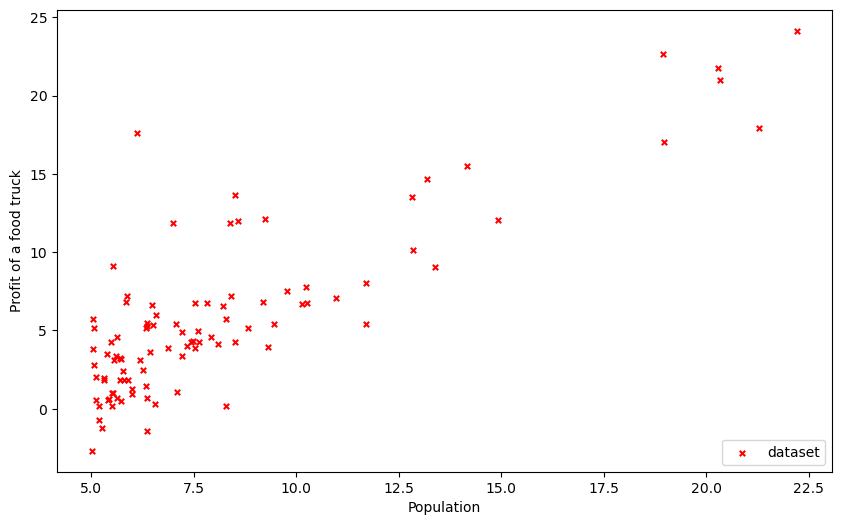

In [4]:
#查看数据的范围,根据具体范围来设定坐标轴的合适显示范围
print("min(x):%f, max(x):%f\nmin(y):%f, max(y):%f"%(np.amin(x),np.amax(x),np.amin(y),np.amax(y)))


fig, ax = plt.subplots(1,1, figsize=(10,6))
#绘制散点图
ax.scatter(x,y, marker="x", s=15, color="r", label="dataset")

#设置坐标轴名称
ax.set_xlabel("Population")
ax.set_ylabel("Profit of a food truck")

ax.legend(loc="lower right")

In [5]:
# 给每个点的x坐标都插入x0 = 1特征值，并且转化为2维数组
x = np.stack([np.array([1]*len(x)), x], axis=1)

In [6]:
# 初始化theta，一定记得设置为浮点类型，否则无法收敛
theta = np.array([0]*x.shape[1], dtype="f8")

In [7]:
# 计算损失函数的值
def costfunc(x, y, theta):
    # cost function
    cost = (1/(2*len(y)))*np.sum(((np.dot(x,theta) - y))**2)
    return cost

In [8]:
# 进行梯度下降
def gradientdescent(x, y, theta, alpha):

    # 一定记得设置为浮点类型，否则无法收敛
    theta_new = np.array([0]*x.shape[1],dtype="f8")
    loss = np.dot(x,theta) - y

    # gradient descent, 同时赋值theta(j)
    for j in range(x.shape[1]):
        theta_new[j] = theta[j]-(alpha/len(y))*np.sum(loss*x[:, j])
    return theta_new

In [9]:
# 设置学习率和学习次数
alpha = 0.01
times = 1000

In [10]:
regcost = [] # 用regcost来保存cost数值变化过程

# 循环times次，计算cost和theta
for _ in range(times):
    cost = costfunc(x, y, theta)
    theta = gradientdescent(x, y, theta, alpha)
    regcost.append(cost)

print("Function after training is: {:.2f} + {:.2f}*x \nCost is {:.2f}".format(theta[0],theta[1], cost))

Function after training is: -3.24 + 1.13*x 
Cost is 4.52


### 训练完之后查看训练好的函数图形

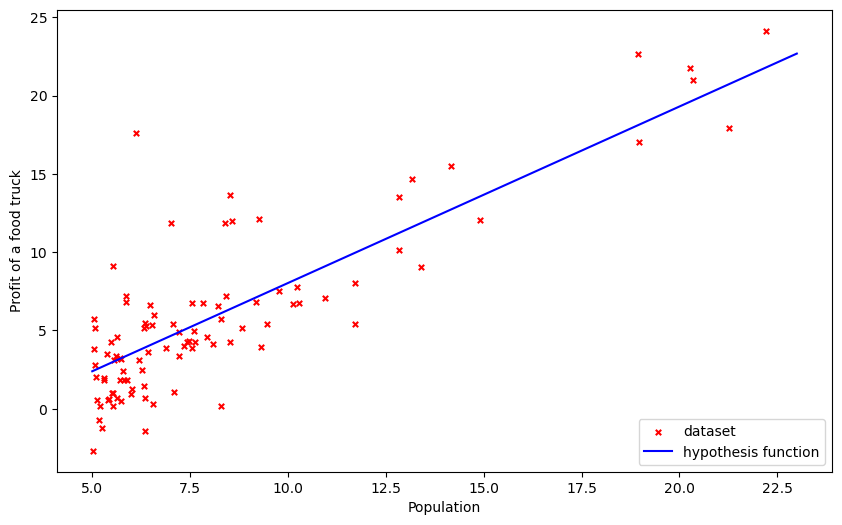

In [11]:
# 设置函数的取样点，
x_sample = np.linspace(5,23,200)
x_sample = np.stack([np.array([1]*len(x_sample)), x_sample], axis=1)
y_sample = np.dot(x_sample,theta)

fig, ax = plt.subplots(1,1, figsize=(10,6))
# 绘制函数和散点图
ax.scatter(x[:,1], y, marker="x", s=15, color="r", label="dataset")
ax.plot(x_sample[:,1], y_sample, "b-", label="hypothesis function")

# 设置坐标轴名称
ax.set_xlabel("Population")
ax.set_ylabel("Profit of a food truck")

ax.legend(loc="lower right")

### 查看训练过程中损失函数值的变化过程

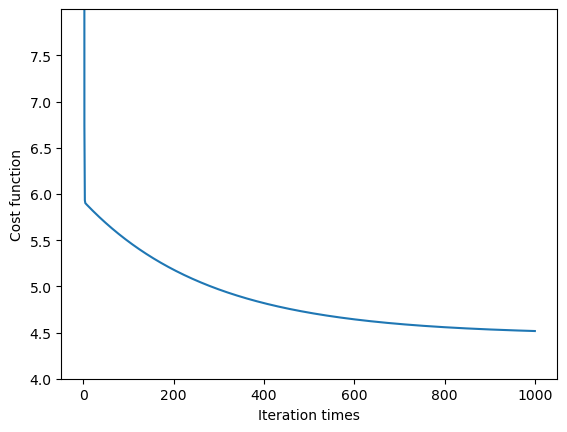

In [12]:
plt.plot(np.arange(1,times+1), regcost, label="cost function")

# 设置坐标轴名称
plt.xlabel("Iteration times")
plt.ylabel("Cost function")

# 设置坐标轴刻度范围，和函数显示范围
# 函数只截取部分显示，这样变化过程更加清楚
plt.yticks(np.arange(4, 8, 0.5))
plt.ylim(4, 8)

plt.show()

#### 最后有一题是绘制3D的损失函数随着参数变化的图像，matplotlib学习pyplot库和面向对象编程花了一周时间从早到晚学习，实在耗费了很大精力。暂时没有多的精力补充这部分内容，等后面4月开学前找时间学习3D绘图的库补上这部分内容，先继续学习机器学习理论和开始pytorch学习    2023/1/6

#### 一开始不太懂，跟着网络上教程直接从简易的pyplot库开始学习，学到差不多发现matplotlib库使用编程方式能更好掌握其中原理并理解。只是使用pyplot的话对其中很多参数掌握似是而非，不能很好的画图。遂重新从开头学习如何正确使用库的方式。

In [13]:
def threedimplot():
    pass